https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg


In [1]:
import math
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Using MPI version 3.1, 1 processes


-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.03757 s
Working in 2D dimensions.
Computational cell is 50 x 34.625 x 0 with resolution 16
     block, center = (0,0,0)
          size (1e+20,1.73205,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     block, center = (0,0,0)
          size (40,34.641,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.76,6.76,6.76)
     cylinder, center = (-20,0.866025,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-20,-0.866025,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-20.5,1.73205,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1

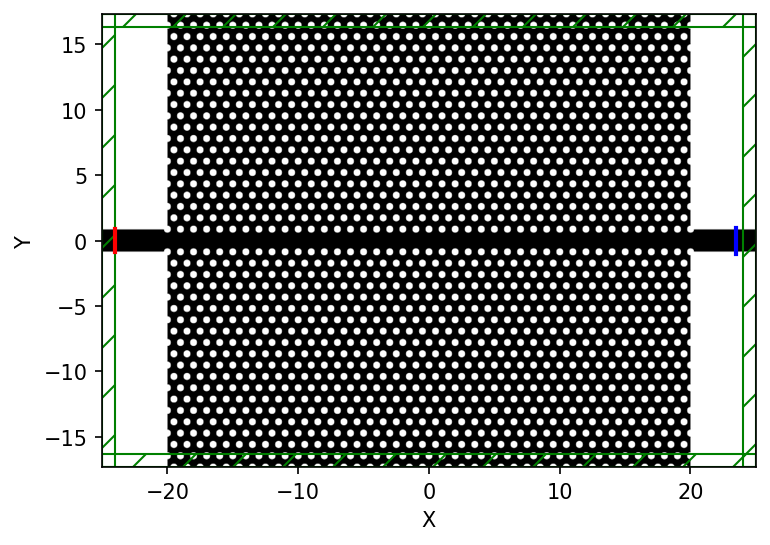

In [4]:
PhC = True
lengthPhC = 40
decay_check=0
T_decay=500

##### setting of parameters #####
widthPhC = 20
ConnectionWaveguide = 5
wgi = 1
r = 1/4
n_eff = 2.6
fcen = 0.3 
df = 0.1
nfreq = 500 # number of frequencies at which to compute flux
resolution = 16

#####
length = lengthPhC + 2*ConnectionWaveguide
width = widthPhC
Nx = int(lengthPhC)
Ny = int(widthPhC)
eps = n_eff**2

##### settings of geometry #####
# initialization
cell = mp.Vector3(length,width*np.sqrt(3),0)

# Si waveguide
waveguide = mp.Block(mp.Vector3(mp.inf,wgi*np.sqrt(3),mp.inf),
                        center=mp.Vector3(),
                        material=mp.Medium(epsilon=eps))
geometry = [waveguide]

# PhC
if PhC:
    # slab
    blk = mp.Block(mp.Vector3(lengthPhC,widthPhC*np.sqrt(3),mp.inf),
                            center=mp.Vector3(),
                            material=mp.Medium(epsilon=eps))

    geometry.append(blk)
    
    # arrange air-holes
    for j in range(Ny):
        for i in range(Nx+1):
            shift_y = np.sqrt(3)
            geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, wgi*np.sqrt(3)/2 + shift_y*j)))
            geometry.append(mp.Cylinder(r, center=mp.Vector3(i-Nx/2, -(wgi*np.sqrt(3)/2 + shift_y*j))))

            geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, wgi*np.sqrt(3)/2 + shift_y*(j+1/2))))
            geometry.append(mp.Cylinder(r, center=mp.Vector3(i-(Nx+1)/2, -(wgi*np.sqrt(3)/2 + shift_y*(j+1/2)))))
            #geometry.append(mp.Cylinder(r, center=mp.Vector3(i-N/2,-wgi*np.sqrt(3)/2)))

# Gaussian
sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                        component=mp.Hz,
                        center=mp.Vector3(-length/2 +1,0),
                        size=mp.Vector3(0,wgi*np.sqrt(3)))
            ]

# PML
pml_layers = [mp.PML(1.0)]

# z-symmetry (上下対称なら計算が軽くなる。対称性が無いなら消す)
sym = [mp.Mirror(mp.Y, phase=-1)]


####
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    symmetries=sym,
                    resolution=resolution)

#tran_in = mp.FluxRegion(center=mp.Vector3(-lengthPhC/2-1,0),size=mp.Vector3(0, 2*wgi))
tran_out = mp.FluxRegion(center=mp.Vector3(length/2-3/2,0),size=mp.Vector3(0, 2*wgi))
#trans_in = sim.add_flux(fcen, df, nfreq, tran_in)
trans_out = sim.add_flux(fcen, df, nfreq, tran_out)

# show geometry
%matplotlib inline
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()    

#sim.run(until=T_decay)

#freqs = mp.get_flux_freqs(trans_out)
#psd_out = mp.get_fluxes(trans_out)




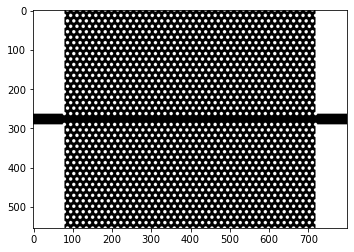

In [5]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#plt.axis('off')
plt.show()

In [6]:
eps_data

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
np.savetxt("epsilon.csv",eps_data,delimiter=",")

In [10]:
ls

CHANGELOG.md*  a.png*         package.nls.json*  test/
LICENSE.txt*   dist/          resources/         test.csv*
README.md*     package.json*  scripts/


In [12]:
import os
os.getcwd()

'/mnt/c/Users/fkh/.vscode/extensions/ms-vscode-remote.remote-wsl-0.50.1'